In [ ]:
from baseline.utils.dataset import FSC22Dataset, get_data_loaders
from baseline.utils.test import *
import torch.nn as nn
from baseline.models.cnn4 import CNNNetwork4

In [ ]:
ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/melspectrograms"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [ ]:
fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE)
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_melspectrogrmas_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

In [ ]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

In [7]:
%reset -f

In [8]:
from baseline.utils.dataset import FSC22Dataset, get_data_loaders
from baseline.utils.test import *
import torch.nn as nn
from baseline.models.cnn4 import CNNNetwork4

In [9]:
ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/audiofeatures"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [10]:
fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE)
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_audiofeatures_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

In [11]:
loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

Available tags in pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Training_vs_Validation_Loss_Training: ['Training_vs_Validation_Loss']
Available tags in pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Training_vs_Validation_Loss_Validation: ['Training_vs_Validation_Loss']


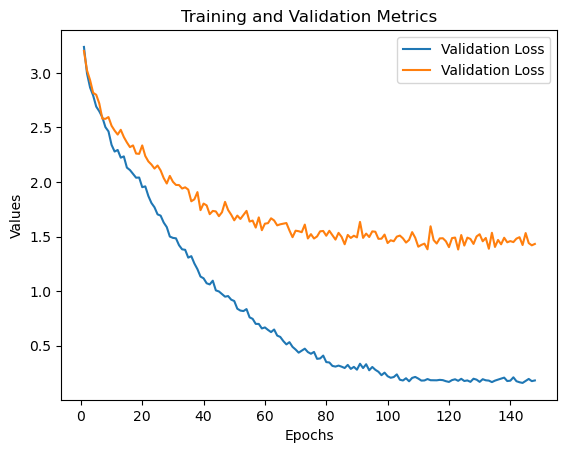

Available tags in pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Val_Accuracy_Val_Accuracy: ['Val_Accuracy']


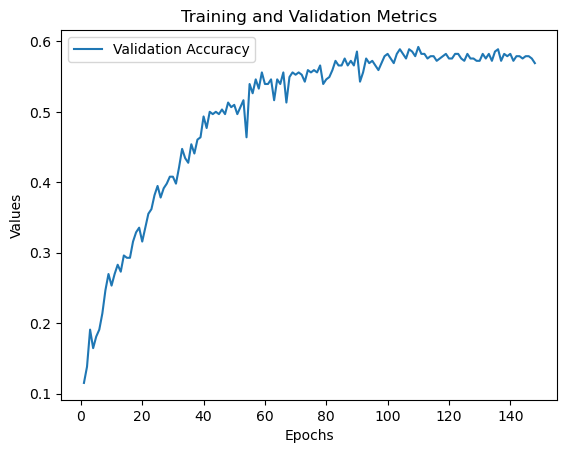

In [34]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Function to load TensorBoard logs
def load_tensorboard_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

# Function to extract scalar metrics
def extract_scalars(event_acc, metric_name):
    scalar_data = event_acc.Scalars(metric_name)
    steps = [x.step for x in scalar_data]
    values = [x.value for x in scalar_data]
    return steps, values

# Function to plot the metrics
def plot_metrics(log_dirs, metrics_dict):
    for log_dir, metric_name in log_dirs.items():
        event_acc = load_tensorboard_logs(log_dir)
        # print(f"Available tags in {log_dir}:", event_acc.Tags()['scalars'])
        steps, values = extract_scalars(event_acc, metric_name)
        plt.plot(steps, values, label=metrics_dict[metric_name])
    
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.show()

log_dirs = {
    'pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Training_vs_Validation_Loss_Training': 'Training_vs_Validation_Loss',
    'pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Training_vs_Validation_Loss_Validation': 'Training_vs_Validation_Loss'
}

metrics_to_plot = {
    'Training_vs_Validation_Loss': 'Training Loss',
    'Training_vs_Validation_Loss': 'Validation Loss'
}

plot_metrics(log_dirs, metrics_to_plot)

log_directory = 'pretrained_models/trained/fsc22_audiofeatures_CNN4/training_losses/Val_Accuracy_Val_Accuracy'
metrics_to_plot = {
    'Val_Accuracy': 'Validation Accuracy'
}

plot_metrics({log_directory: 'Val_Accuracy'}, metrics_to_plot)


In [ ]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

In [ ]:
%reset -f

In [ ]:
from augmented.utils.dataset import FSC22Dataset, get_data_loaders
from augmented.utils.test import *
import torch.nn as nn
from augmented.models.cnn4 import CNNNetwork4

In [ ]:
ANNOTATIONS_FILE = "fsc22_data/augmented_A_100/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/augmented_A_100_melspectrograms"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [ ]:
fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE)
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_augmented_A_100_melspectrograms_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        batch_size=BATCH_SIZE
    )

In [ ]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)

In [ ]:
%reset -f

In [1]:
from transfer_learning_v2.utils.dataset import FSC22Dataset, get_data_loaders
from transfer_learning_v2.utils.test import *
import torch.nn as nn
from transfer_learning_v2.models.cnn4 import CNNNetwork4

In [2]:
ANNOTATIONS_FILE = "fsc22_data/raw/metadata/metadata.csv"
AUDIO_DIR= "fsc22_data/preprocessed/melspectrograms"
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
NUM_CLASSES = 27
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [3]:
fsc22 = FSC22Dataset(annotations_file=ANNOTATIONS_FILE, data_dir=AUDIO_DIR, device=DEVICE, model_str="CNN4")
dim1 = fsc22[0][0].shape[1]
dim2 = fsc22[0][0].shape[2]
cnn = CNNNetwork4(dim1, dim2, NUM_CLASSES)
cnn.load_state_dict(torch.load("pretrained_models/trained/fsc22_melspectrograms_transfer_v2_CNN4/best_model/model.pth", map_location=torch.device('cpu')))
cnn = cnn.to(DEVICE)

In [4]:
loss_fn = nn.CrossEntropyLoss()

train_data_loader, val_data_loader, test_data_loader = get_data_loaders(
        dataset=fsc22,
        train_size=TRAIN_SIZE,
        val_size=VAL_SIZE,
        test_size=TEST_SIZE,
        batch_size=BATCH_SIZE
    )

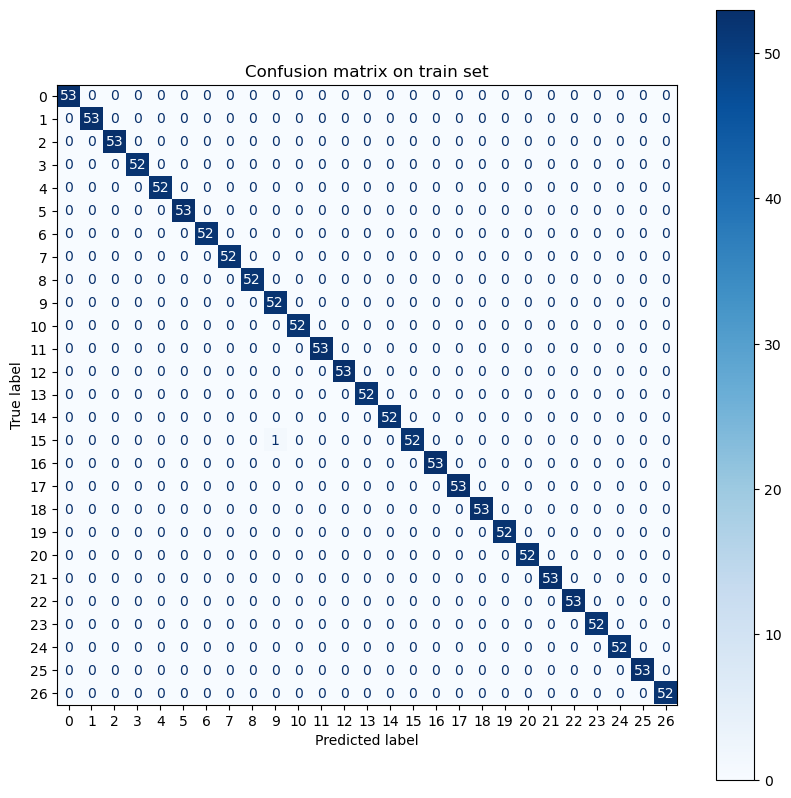


Evaluation on train set:

Loss: 0.0015079991765863572
Accuracy: 0.9992942810058594
Precision: 0.9993011951446533
Recall: 0.9993011951446533
F1 Score: 0.9992945194244385


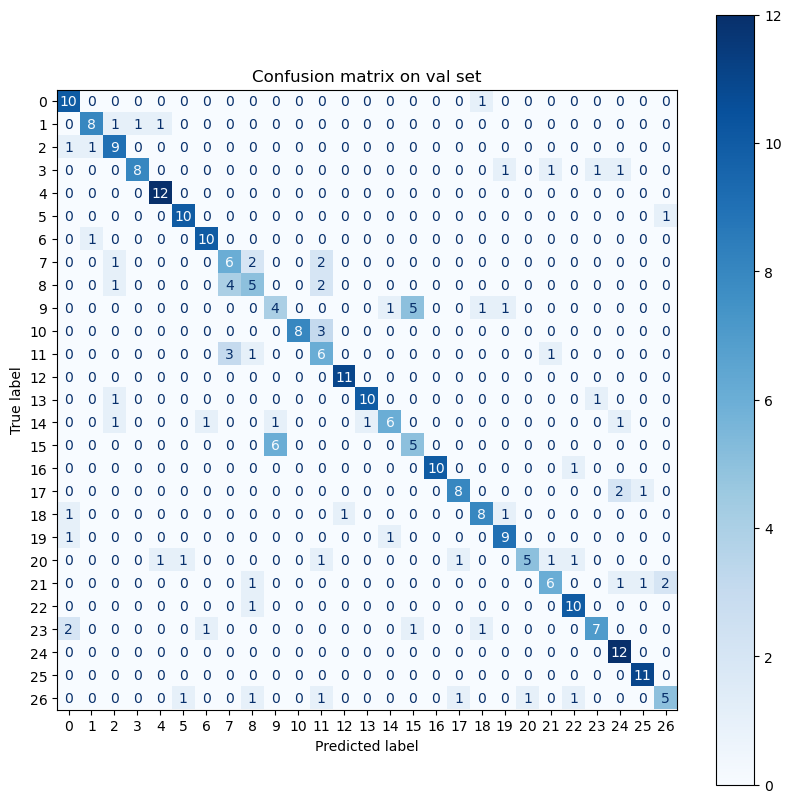


Evaluation on val set:

Loss: 1.0686802665392559
Accuracy: 0.7203947305679321
Precision: 0.7308727502822876
Recall: 0.721099853515625
F1 Score: 0.716914176940918


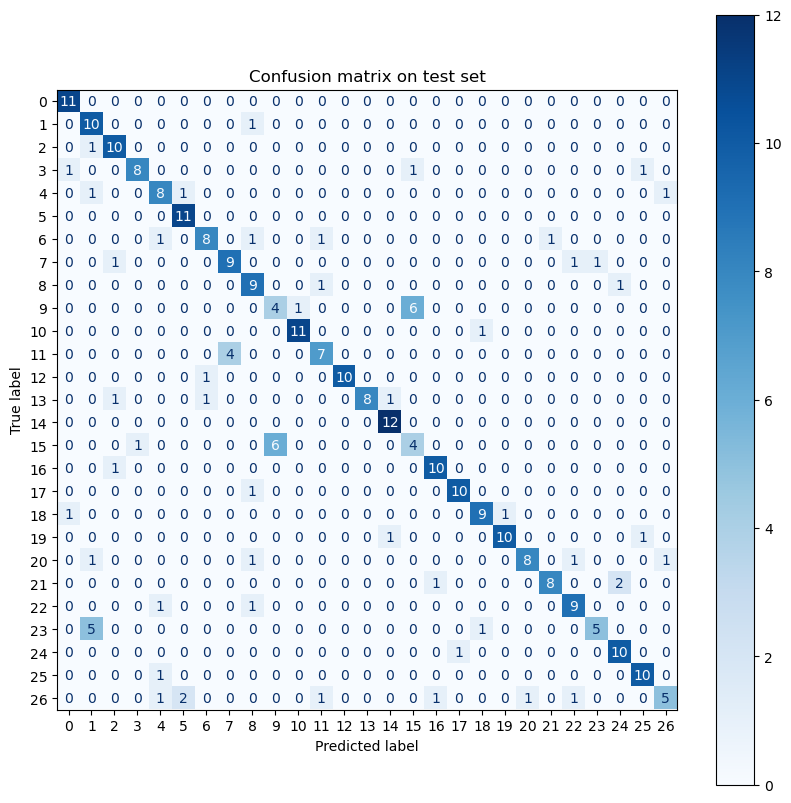


Evaluation on test set:

Loss: 0.7973463733990988
Accuracy: 0.7697368264198303
Precision: 0.7789807319641113
Recall: 0.7702019810676575
F1 Score: 0.7650530338287354


In [6]:
test(cnn, train_data_loader, loss_fn, DEVICE, "train", NUM_CLASSES, None)
test(cnn, val_data_loader, loss_fn, DEVICE, "val", NUM_CLASSES, None)
test(cnn, test_data_loader, loss_fn, DEVICE, "test", NUM_CLASSES, None)